# Visualization Notebook
This notebook generates feature importance, confusion matrix, and density heatmap.

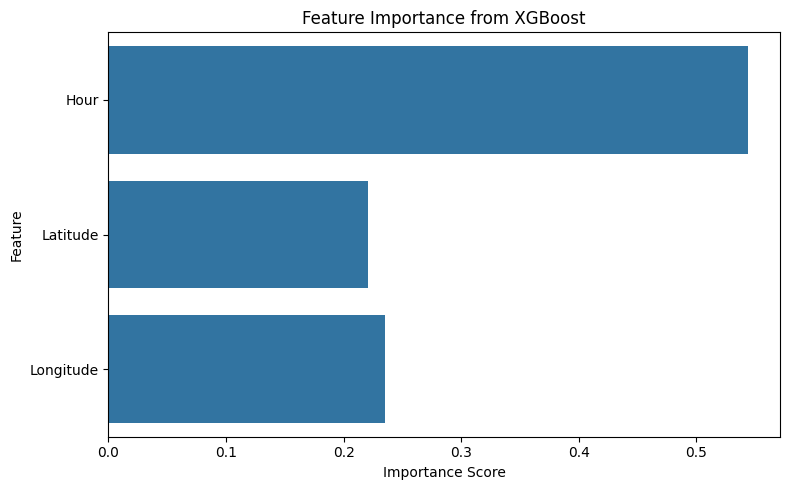

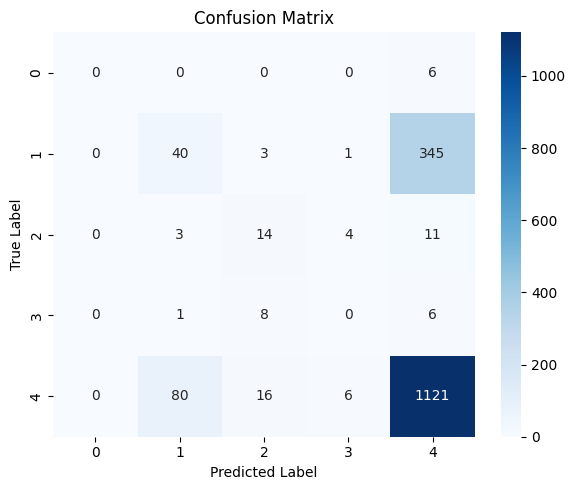

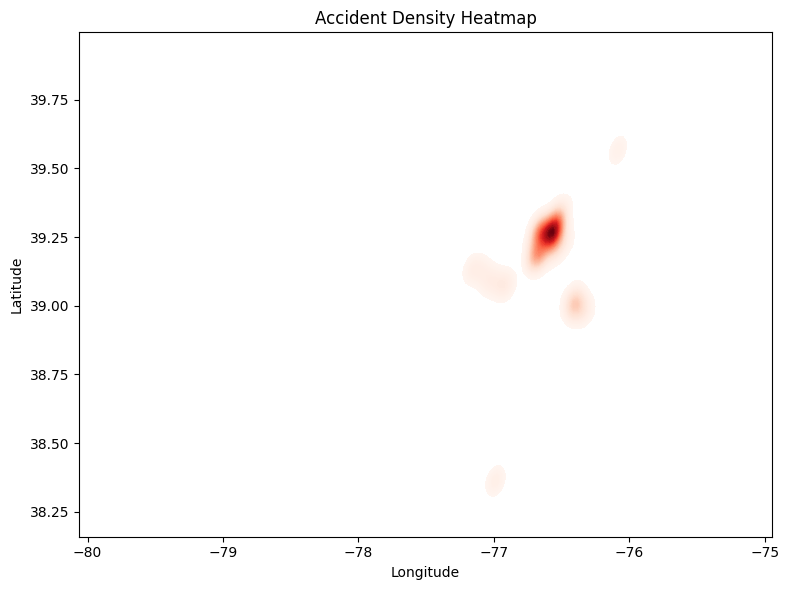

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load processed data
df = pd.read_csv("../data/processed_accidents.csv")

# Drop missing values
df = df.dropna(subset=["Hour", "Latitude", "Longitude", "Accident Type"])

# Features and target
X = df[["Hour", "Latitude", "Longitude"]]
y_raw = df["Accident Type"]

# Encode target
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Feature Importance
importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance from XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../figures/feature_importance.png")
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("../figures/confusion_matrix.png")
plt.show()

# Density Heatmap
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=df["Longitude"],
    y=df["Latitude"],
    fill=True,
    cmap="Reds",
    thresh=0.05,
    levels=100
)
plt.title("Accident Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.savefig("../figures/density_heatmap.png")
plt.show()